In [1]:

import yfinance as yf
import pandas as pd
import ta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


In [2]:

# Fetch historical data for Bitcoin (BTC-USD)
crypto = 'BTC-USD'
data = yf.download(crypto, start="2020-01-01", interval='1d')


[*********************100%%**********************]  1 of 1 completed


In [ ]:
["MEDCPIM158SFRBCLE", "PALLFNFINDEXQ"]

In [4]:

# Resample data to weekly frequency
weekly_data = data.resample('W').last()

# Create the target variable (1 for buy, 0 for not buy)
weekly_data['Target'] = (weekly_data['Close'].shift(-1) > weekly_data['Close']).astype(int)

# Drop the last row (where the target is NaN)
weekly_data.dropna(inplace=True)


In [5]:
weekly_data

,Open,High,Low,Close,Adj Close,Volume,SMA,EMA,RSI,MACD,Bollinger_Middle,Bollinger_High,Bollinger_Low,Target
Date,,,,,,,,,,,,,,
2020-02-09,9863.894531,10129.435547,9850.392578,10116.673828,10116.673828,35807884663,9201.032324,9287.659907,76.204072,45.342388,9201.032324,10213.814123,8188.250525,0
2020-02-16,9889.179688,10053.968750,9722.386719,9934.433594,9934.433594,43374780305,9730.434277,9695.492376,59.891859,-26.132760,9730.434277,10462.883296,8997.985259,0
2020-02-23,9663.318359,9937.404297,9657.791016,9924.515625,9924.515625,41185185761,9869.566064,9729.214952,56.525245,-86.469229,9869.566064,10431.335523,9307.796606,0
2020-03-01,8599.758789,8726.796875,8471.212891,8562.454102,8562.454102,35349164300,9583.204980,9287.231046,34.360692,-186.802563,9583.204980,10738.297099,8428.112862,0
2020-03-08,8908.206055,8914.343750,8105.252930,8108.116211,8108.116211,39973102121,9136.069629,9030.278615,32.845039,-70.143820,9136.069629,10184.401576,8087.737682,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-07,58239.429688,58371.121094,55793.324219,55849.109375,55849.109375,20553359505,61384.542969,61099.511274,30.634343,-458.409823,61384.542969,66830.322105,55938.763833,1
2024-07-14,59225.250000,61329.527344,59225.250000,60787.792969,60787.792969,22223416061,59433.755859,59772.337704,50.771532,397.833907,59433.755859,63755.602284,55111.909434,1
2024-07-21,67164.914062,68372.906250,65842.296875,68154.523438,68154.523438,26652190004,60890.254883,62895.952364,67.602466,1229.327166,60890.254883,68720.495885,53060.013880,1


In [6]:

# Define the feature columns
features = ['SMA', 'EMA', 'RSI', 'MACD', 'Bollinger_Middle', 'Bollinger_High', 'Bollinger_Low']

# Create the feature matrix (X) and target vector (y)
X = weekly_data[features]
y = weekly_data['Target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)


In [7]:

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))


Accuracy: 0.5106382978723404
              precision    recall  f1-score   support

           0       0.49      0.95      0.65        22
           1       0.75      0.12      0.21        25

    accuracy                           0.51        47
   macro avg       0.62      0.54      0.43        47
weighted avg       0.63      0.51      0.41        47



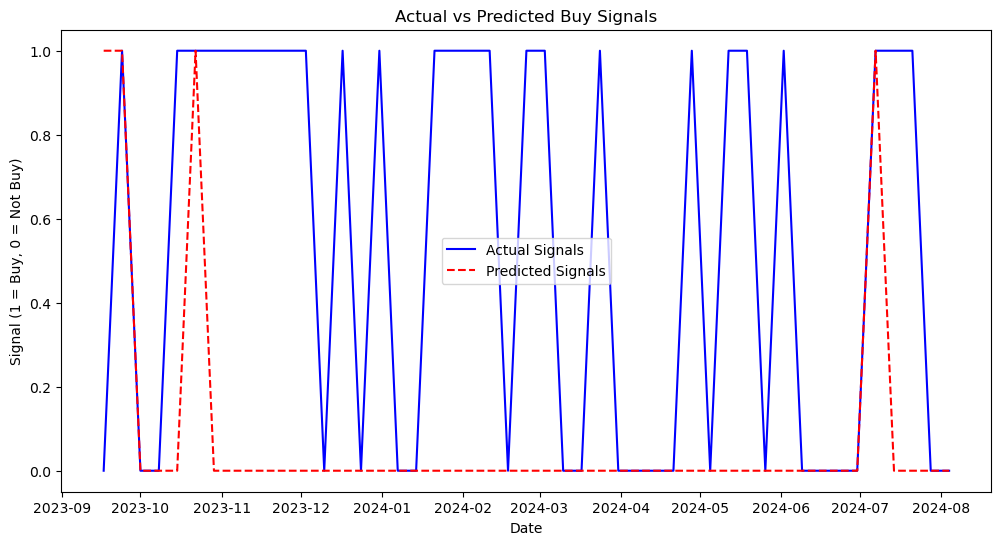

In [8]:

# Plot actual vs predicted signals
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Signals', color='b')
plt.plot(y_test.index, y_pred, label='Predicted Signals', color='r', linestyle='--')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Signal (1 = Buy, 0 = Not Buy)')
plt.title('Actual vs Predicted Buy Signals')
plt.show()


<Axes: xlabel='Date'>

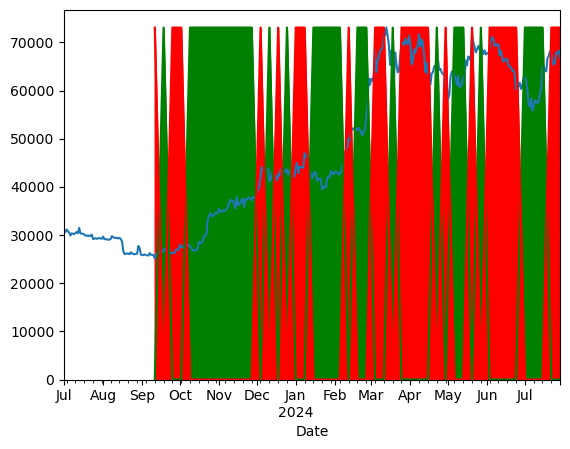

In [9]:

plot_pred = y_test.copy()
price_data = data.loc['2023-7-1':,'Close']
price_data.plot()
plot_pred.replace(1,price_data.max()).plot(kind='area', color = 'g')
plot_pred.replace(0,price_data.max()).plot(kind='area', color = 'r')



In [10]:
signal = "Buy" if y_pred[-1] == 1 else "Sell"
print("Signal for this week is: ",signal)

Signal for this week is:  Sell


In [11]:
# Printing the 1st 5 columns
data.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,EMA,RSI,MACD,Bollinger_Middle,Bollinger_High,Bollinger_Low
Date,,,,,,,,,,,,,
2020-02-03,9344.683594,9540.372070,9248.633789,9293.521484,9293.521484,30934096509,8924.262646,8897.249073,65.841806,24.282004,8924.262646,9642.172586,8206.352706
2020-02-04,9292.841797,9331.265625,9112.811523,9180.962891,9180.962891,29893183716,8942.960254,8924.269437,61.950229,1.907049,8942.960254,9667.132665,8218.787843
2020-02-05,9183.416016,9701.299805,9163.704102,9613.423828,9613.423828,35222060874,8987.442139,8989.903188,69.427010,12.258534,8987.442139,9759.975601,8214.908676
2020-02-06,9617.821289,9824.619141,9539.818359,9729.801758,9729.801758,37628823716,9027.480322,9060.369719,71.074246,22.380057,9027.480322,9864.100356,8190.860289
2020-02-07,9726.002930,9834.716797,9726.002930,9795.943359,9795.943359,34522718159,9070.137061,9130.424351,71.997669,28.569883,9070.137061,9969.763604,8170.510517


In [15]:
import yfinance as yf
import pandas as pd
import ta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Fetch historical data for Bitcoin (BTC-USD)
crypto = 'BTC-USD'
data = yf.download(crypto, start="2020-01-01", interval='1d')

# Calculate technical indicators
data['SMA'] = ta.trend.sma_indicator(data['Close'], window=20)
data['EMA'] = ta.trend.ema_indicator(data['Close'], window=20)
data['RSI'] = ta.momentum.rsi(data['Close'], window=14)
data['MACD'] = ta.trend.macd_diff(data['Close'])
data['Bollinger_Middle'] = ta.volatility.bollinger_mavg(data['Close'])
data['Bollinger_High'] = ta.volatility.bollinger_hband(data['Close'])
data['Bollinger_Low'] = ta.volatility.bollinger_lband(data['Close'])

# Drop rows with NaN values
data.dropna(inplace=True)

# Resample data to weekly frequency
weekly_data = data.resample('W').last()

# Create the target variable (1 for buy, 0 for not buy)
weekly_data['Target'] = (weekly_data['Close'].shift(-1) > weekly_data['Close']).astype(int)

# Drop the last row (where the target is NaN)
weekly_data.dropna(inplace=True)

# Features and target
X = weekly_data[['SMA', 'EMA', 'RSI', 'MACD', 'Bollinger_Middle', 'Bollinger_High', 'Bollinger_Low']]
y = weekly_data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Use GridSearchCV for RandomForestClassifier
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

print(f"Best parameters for RandomForest: {grid_search_rf.best_params_}")
print(f"Best score for RandomForest: {grid_search_rf.best_score_}")

# Train the RandomForest model with best parameters
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)

# Evaluate the RandomForest model
print(f"RandomForest Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))

# Use GridSearchCV for GradientBoostingClassifier
grid_search_gb = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)

print(f"Best parameters for GradientBoosting: {grid_search_gb.best_params_}")
print(f"Best score for GradientBoosting: {grid_search_gb.best_score_}")

# Train the GradientBoosting model with best parameters
best_model_gb = grid_search_gb.best_estimator_
y_pred_gb = best_model_gb.predict(X_test)

# Evaluate the GradientBoosting model
print(f"GradientBoosting Accuracy: {accuracy_score(y_test, y_pred_gb)}")
print(classification_report(y_test, y_pred_gb))


[*********************100%%**********************]  1 of 1 completed


Best parameters for RandomForest: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 200}
Best score for RandomForest: 0.5004267425320057
RandomForest Accuracy: 0.48936170212765956
              precision    recall  f1-score   support

           0       0.42      0.50      0.45        20
           1       0.57      0.48      0.52        27

    accuracy                           0.49        47
   macro avg       0.49      0.49      0.49        47
weighted avg       0.50      0.49      0.49        47

Best parameters for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best score for GradientBoosting: 0.5635846372688478
GradientBoosting Accuracy: 0.574468085106383
              precision    recall  f1-score   support

           0       0.50      0.75      0.60        20
           1       0.71      0.44      0.55        27

    accuracy                           0.57        47
   macro avg       0.60      0.60      0.57      